### WEB CRUSADERS

C:\Users\kenneth jason\AppData\Local\Temp\ipykernel_24864\3799654219.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='AgeGroup', data=victims_data, palette='muted')


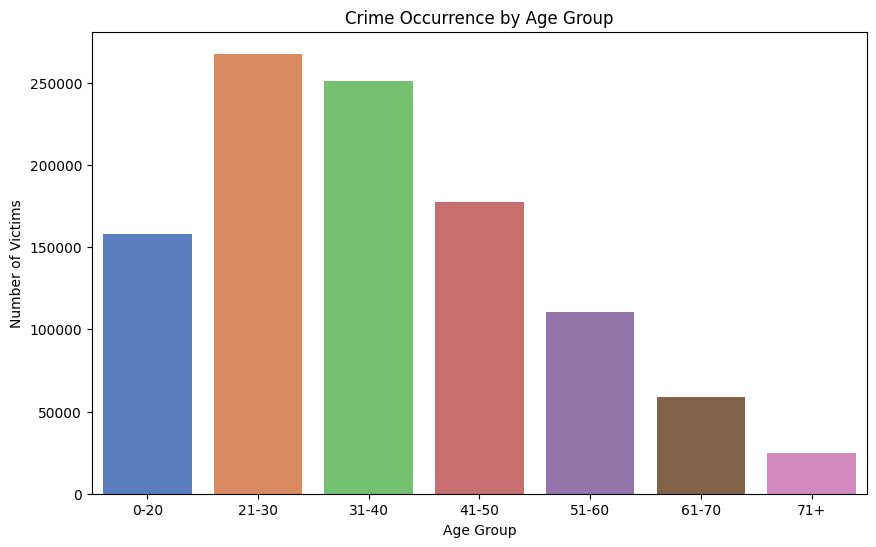

C:\Users\kenneth jason\AppData\Local\Temp\ipykernel_24864\3799654219.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=victims_data, palette='muted')


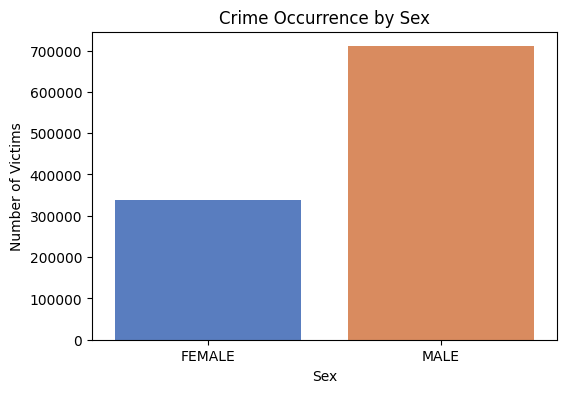

C:\Users\kenneth jason\AppData\Local\Temp\ipykernel_24864\3799654219.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='District_Name', data=victims_data, palette='muted')


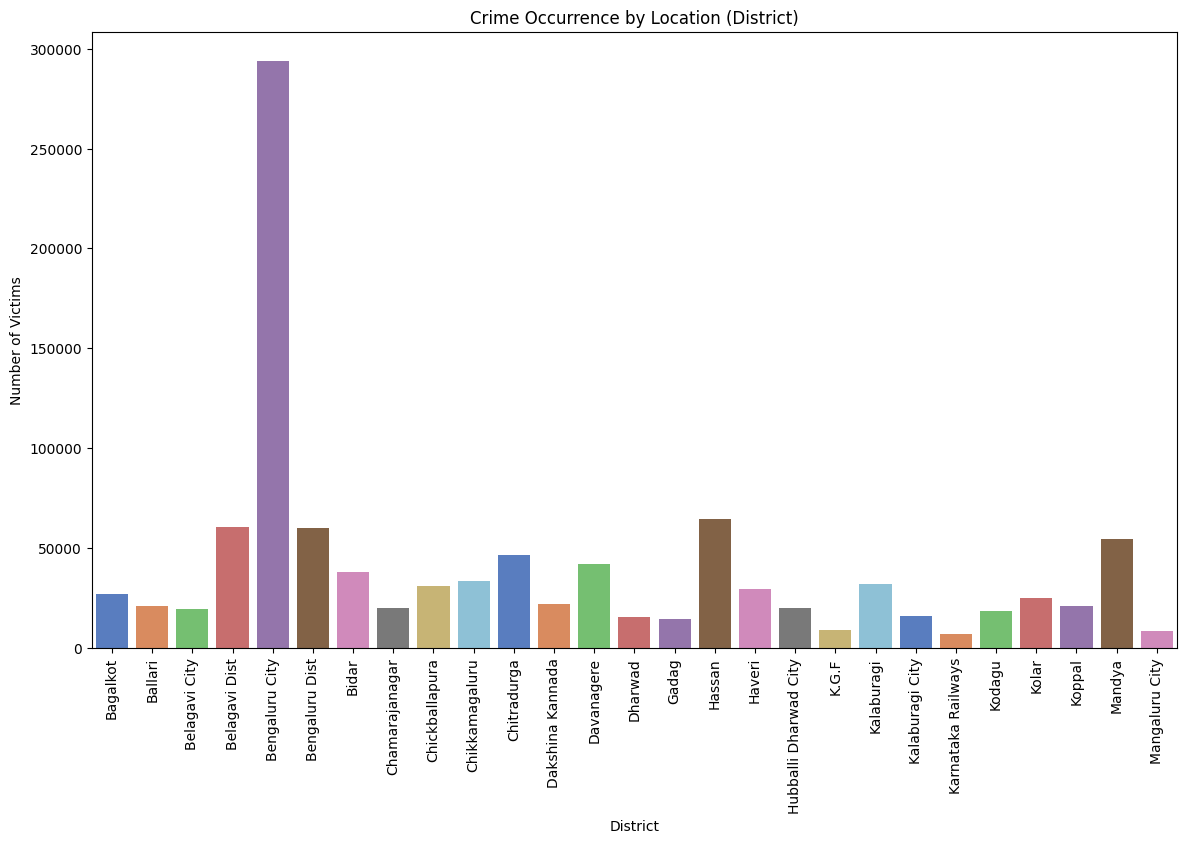

Enter the name of the district to predict the probability for:  Bidar


The probability of a crime occurring in Bidar district is: 3.64%


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
victims_data = pd.read_csv('victims_dataset.csv')

# Filter out the "Enuch" category from the dataset
victims_data = victims_data[victims_data['Sex'] != 'Enuch']

# Preprocess the data if needed

# Adjust age probability values to increase importance
age_probabilities = {
    '0-20': 0.1,
    '21-30': 0.3,
    '31-40': 0.5,
    '41-50': 0.6,
    '51-60': 0.5,
    '61-70': 0.3,
    '71+': 0.1
}

# Update profession values dictionary
profession_values = {
    "labourer": 1,
    "farmer": 2,
    "housewife": 3,
    "driver": 4,
    "student": 5,
    "others pi specify": 6,
    "ceo": 7,
    "businessman": 8,
    "electrician": 9,
    "bank employee": 10,
    "central govt.employee": 11
}

# Adjust district crime rates based on number of occurrences in the dataset
district_crime_rates = victims_data['District_Name'].value_counts(normalize=True).to_dict()

# Considering gender distribution
total_victims = len(victims_data)
male_count = victims_data['Sex'].value_counts().get('MALE', 0)
female_count = victims_data['Sex'].value_counts().get('FEMALE', 0)
male_probability = male_count / total_victims
female_probability = female_count / total_victims

# Define the additional contribution for gender
male_contribution = 0.1  # Adjust as needed
female_contribution = 0.05  # Adjust as needed

# Group age into predefined age ranges
age_bins = [0, 20, 30, 40, 50, 60, 70, np.inf]
age_labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71+']
victims_data['AgeGroup'] = pd.cut(victims_data['age'], bins=age_bins, labels=age_labels, right=False)

# Combine probabilities
victims_data['CriminalityProbability'] = (victims_data['AgeGroup'].map(age_probabilities) + 
                                           victims_data['Profession'].map(profession_values) + 
                                           victims_data['District_Name'].map(district_crime_rates) +
                                           np.where(victims_data['Sex'] == 'MALE', male_contribution, female_contribution))

# Analyze data
# Plot the trend of crime occurrence by age group
plt.figure(figsize=(10, 6))
sns.countplot(x='AgeGroup', data=victims_data, palette='muted')
plt.title('Crime Occurrence by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Victims')
plt.show()

# Plot the trend of crime occurrence by sex
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', data=victims_data, palette='muted')
plt.title('Crime Occurrence by Sex')
plt.xlabel('Sex')
plt.ylabel('Number of Victims')
plt.show()

# Plot the trend of crime occurrence by location (District_Name)
plt.figure(figsize=(14, 8))
sns.countplot(x='District_Name', data=victims_data, palette='muted')
plt.title('Crime Occurrence by Location (District)')
plt.xlabel('District')
plt.ylabel('Number of Victims')
plt.xticks(rotation=90)
plt.show()

# Calculate the total number of crimes
total_crimes = len(victims_data)

# Prompt the user to input the district they want to predict the probability for
district_to_predict = input("Enter the name of the district to predict the probability for: ")

# Calculate the number of crimes in the specified district
crimes_in_district = victims_data[victims_data['District_Name'] == district_to_predict]

# Check if the district entered by the user exists in the dataset
if len(crimes_in_district) == 0:
    print("District not found in the dataset.")
else:
    # Calculate the probability of a crime occurring in the specified district
    district_crime_probability = len(crimes_in_district) / total_crimes
    print(f"The probability of a crime occurring in {district_to_predict} district is: {district_crime_probability:.2%}")